In [34]:
# 1) Design model (input size, output size, forward pass)
# 2) Costruct the Loss and Optimizer
# 3) Training loop
#       - Forward pass: compute prediction
#       - Backward pass: compure gradients
#       - Update our weights
#       - Iterate this a couple of times (epochs)

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [35]:
# 0) Prepare our data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)  # Generate some random samples according to your specifications
print(X_numpy.shape)
print(Y_numpy.shape)

# convert to torch tensor
X = torch.from_numpy(X_numpy.astype(np.float32)) # this conversion to np.float32 was to avoid some type error later

Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0], 1) # Y only has one row, we want to make it a column vector [view() is a function to reshape our tensor]
print(Y.shape)

n_samples, n_features = X.shape # 100, 1

(100, 1)
(100,)
torch.Size([100, 1])


In [36]:
# 1) Model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)

In [37]:
# 2) Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss: 4307.4043
epoch: 20, loss: 3215.3140
epoch: 30, loss: 2425.1421
epoch: 40, loss: 1852.8091
epoch: 50, loss: 1437.8503
epoch: 60, loss: 1136.7169
epoch: 70, loss: 918.0011
epoch: 80, loss: 759.0227
epoch: 90, loss: 643.3829
epoch: 100, loss: 559.2119


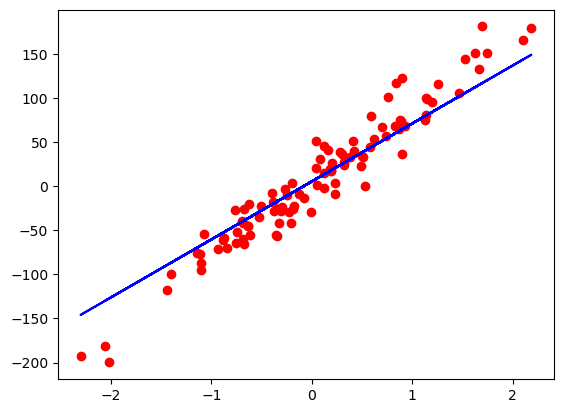

In [38]:
# 3) Training Loop
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)

    # Backward pass (backpropagation)
    loss.backward()

    # update
    optimizer.step() # update the weights

    optimizer.zero_grad() # empty the gradients

    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch+1}, loss: {loss.item():.4f}")


# Plot

# call our final model
predicted = model(X).detach().numpy() # We want to convert to numpy.  PS: detach() will generate a new tensor with 'gradient_cal' attribute as false

plt.plot(X_numpy, Y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()